#### Sr. Engineer: Dhruv Singh <br> Project Name: Success Classifier <br> Phase: Modelling - Decision Trees <br> Date Updated: 01/19/2022

One of the most important considerations when choosing a machine learning algorithm is how interpretable it is. The ability to explain how an algorithm makes predictions is useful to not only you, but also to potential stakeholders. A very interpretable machine learning algorithm is a decision tree which you can think of as a series of questions designed to assign a class or predict a continuous value depending on the task. The example image is a decision tree designed for classification.

In this video, I'll share with you how you can create and tune a decision tree using scikit-learn. 

## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [2]:
data = pd.read_csv('1_readonly/Services.csv')

In [3]:
# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target
# df.head()

## Splitting Data into Training and Test Sets

![images](images/trainTestSplit.png)
The colors in the image indicate which variable (X_train, X_test, Y_train, Y_test) the data from the dataframe df went to for a particular train test split (not necessarily the exact split of the code below).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:11], data['Employed'], random_state=0)

Note, another benefit of Decision Trees is that you don’t have to standardize your features unlike other algorithms like logistic regression and K-Nearest Neighbors. 

## Decision Tree

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [5]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier

<b>Step 2:</b> Make an instance of the Model

This is a place where we can tune the hyperparameters of a model. The code below constrains the model to have at most a depth of 2. Tree depth is a measure of how many splits it makes before coming to a prediction.

![images](images/max_depth_not_depth.png)

In [6]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features sepal width, sepal height etc) and y (labels-which species of iris)

In [7]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

<b>Step 4:</b> Predict the labels of new data (new flowers)

Uses the information the model learned during the model training process

In [8]:
# Predict for One Observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([0], dtype=int64)

Predict for Multiple Observations at Once

In [9]:
clf.predict(X_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Measuring Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, [ROC Curve](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0), etc), we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [10]:
score = clf.score(X_test, y_test)
print(score)

0.7193184194020489


## Finding the Optimal `max_depth`

In [11]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

<ipython-input-12-f62911ef65bc>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklist)


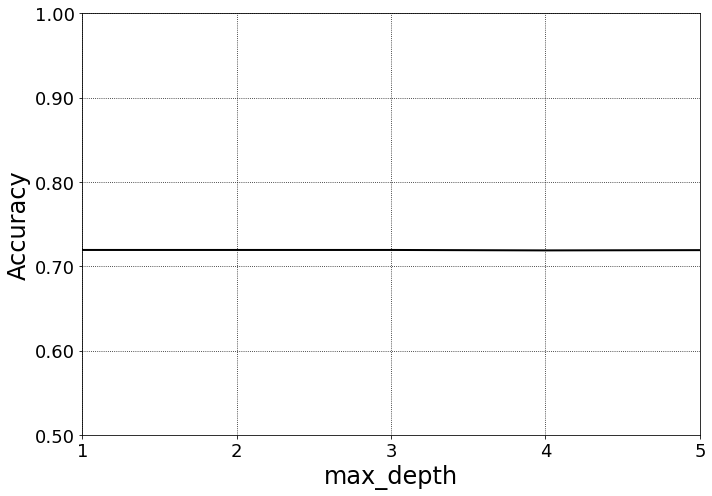

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

So that's it, I encourage you to try and see if you can create a decision tree of your own. 